# 10339 - Catalysis: Homework \#6 Solutions
## Electrocatalysis

Recall the oxygen reduction reaction(ORR):

$$ \text{O}_{2}(g) +4(\text{H}^++e^-) \rightleftharpoons 2\text{H}_{2}\text{O}(g) \quad \Delta G = -4.92\text{ eV} $$
with the mechanism:
\begin{eqnarray}
*+\text{O}_{2}(g) + (\text{H}^++e^-) &\rightleftharpoons& \text{OOH}^* \\
\text{OOH}^*     + (\text{H}^++e^-) &\rightleftharpoons& \text{O}^*+\text{H}_{2}\text{O}(g) \\
\text{O}^* + (\text{H}^++e^-) &\rightleftharpoons& \text{OH}^* \\
\text{OH}^* + (\text{H}^++e^-) &\rightleftharpoons& \text{H}_{2}\text{O}(g) + *
\end{eqnarray}


The conditions are $T$ = 300 K and pH = 0 and $p_{\text{H}_{2}\text{O}}$ = 0.035 bar and  $p_{\text{O}_{2}}$ = 1 bar. At these conditions $\text{H}_{2}\text{O}(g)$ and $\text{H}_{2}\text{O}(l)$ are in thermodynamic equilibrium. Use the following assumptions for this reaction:

1. The energies of some species can be looked up in the CatApp:
    1. For OH$^*$ look up \[H$_{2}$O(g)$\rightarrow$ H$^*$+OH$^*$] and [H$_{2}$(g) $\rightarrow$ 2H$^*$]
    2. For O$^*$  look up additionally [OH$^*\rightarrow$ H$^*$+O$^*$] 
2. Use the computational hydrogen electrode (CHE). At the employed conditions and $U$ = 0 V, we have:
$$2 (\text{H}^++\text{e}^-) \rightleftharpoons \text{H}_{2}(g) \quad \Delta G(U = 0 \text{ V}) = 0\text{ eV}$$

3. The only necessary corrections for entropy, zero-point vibrations, solvation and coverage effects are given by:
\begin{eqnarray*}
G_{\rm{O^*}}  =& E_{\rm{O^*}}  + 0.01 \,\,\rm{eV} \\
G_{\rm{OH^*}} =& E_{\rm{OH^*}} - 0.25 \,\,\rm{eV}  .
\end{eqnarray*}
 
4. It is observed (independent of the specific surface!):
$$\text{OOH*}+(2\text{H}^+ + \text{e}^-) \rightleftharpoons \text{OH*}+\text{H}_2\text{O}(g) \quad \Delta G(U=\text{0V})=-3.20\text{ eV}$$

5. At a potential, $U$, the reaction free energy of reaction ($i$) is given by:
$$\Delta G_i(U) = \Delta G_i(0 \text{V})-U q$$
    where $q$ is the charge of an electron.

6. Use the usual approximation in computational modeling that coupled electron-proton transfers have a significant rate only if $\Delta G_i \le 0$ for each reaction step ($i$).

## 1)

Using the assumptions outlined above, calculate the reaction energies ($\Delta E$) and Gibbs free reaction energies ($\Delta G(U = 0 \rm{V})$)
for the close-packed (111) surfaces of (Ru, Rh, Pt, Pd, Cu, Au) for reactions (1-4).
You may use Ru(0001) where data for Ru(111) is not available.
Reference everything to H$_{2}$O$_{(\rm{g})}$ and H$_{2(\rm{g})}$ (G$_{\rm{H_2O_{(\rm{g})}}}$ = G$_{\rm{H_{2(\rm{g})}}}$ = 0)

### Solution

Looking up the reaction energies from CatApp 
\begin{align}
\text{H}_{2}\text{O}(g) &\rightleftharpoons& \text{H}^*+\text{OH}^* \qquad  &\Delta E_{C1} \notag \\
\text{H}_{2}(g) &\rightleftharpoons& 2\text{H}^* \qquad  &\Delta E_{C2} \notag \\
\text{OH}^* &\rightleftharpoons& \text{H}^*+\text{O}^* \qquad &\Delta E_{C3} \notag
\end{align}

and collecting the energies.

From this one obtains the adsorption energies of OH$^*$ and O$^*$ relative to water and hydrogen:
\begin{align}
E_{ \rm{OH^*}} =& \Delta E_{C1} - 0.5 \Delta E_{C2} \notag \\
E_{ \rm{O^*} } =& \Delta E_{C1} + \Delta E_{C3} - \Delta E_{C2}, \notag
\end{align}
and the free energies applying the mentioned corrections:
\begin{align}
\Delta G_4 =& - (E_{ \rm{OH^*}} -0.25 \rm{eV}             ) \notag  \\
\Delta G_3 =&   (E_{ \rm{OH^*}} -0.25 \rm{eV}             ) -  (E_{ \rm{O^*}} +0.01 \rm{eV}              ) \notag \\
\Delta G_2 =&   (E_{ \rm{O^*}}  +0.01 \rm{eV}             ) -  (E_{ \rm{OH^*}} -0.25 \rm{eV} +3.2 \rm{eV}) \notag \\
\Delta G_1 =&   (E_{ \rm{OH^*}} -0.25 \rm{eV} +3.2 \rm{eV}) -4.92 \rm{eV} \notag
\end{align}

In [1]:
 %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from ase.db import connect
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import pickle
import copy

# Connect to the CatApp database
catapp=connect('catapp.db')

def reaction(catapp,reverse=False,**kwargs):
    """Download reactions from CatApp. ab -> a + b if reverse=False
        Parameters :
            catapp : database
                The CatApp database
            reverse : bool
                if reverse=False: ab -> a + b or reverse=True: a + b -> ab
            kwargs : dict
                A dictionary with a, b, ab and the surface
        Returns : 
            output : list
                Output is a list with the reaction, the surface, 
                energy of the reaction and the activation energy
    """
    output=[]
    for row in catapp.select(**kwargs):
        er=row.er
        ea=row.ea
        ea=np.max([0,er,ea])
        if reverse==True:
            er=-er
            ea+=er
            # The activation energy must be the largest
            ea=np.max([0,er,ea])
            react='{} + {} -> {}'.format(row.a,row.b,row.ab)
            surf=row.surface
        else:
            react='{} -> {} + {}'.format(row.ab,row.a,row.b)
            surf=row.surface
        output.append((react,surf,er,ea))
    return output
        
def reaction_dict(catapp,reverse=False,react_list=[],pd_react=None,**kwargs):
    """A wrapper that makes a dict of the data from CatApp
        Parameters :
            catapp : database
                The CatApp database
            reverse : bool
                if reverse=False: ab -> a + b or reverse=True: a + b -> ab
            react_list : list of str
                A list of all the reactions (can be continued in a new function call)
            pd_react : dict
                A dictionary with the surfaces, energy differences and activation energies
                that can be continued in a new function call
            kwargs : dict
                A dictionary with a, b, ab and the surface
        Returns : 
            pd_react : dict
                A dictionary with the surface, 
                energy of the reaction and the activation energy
            react_list : list
                A list of all the reactions
    """
    if pd_react is None:
        pd_react={'Surface':[],'E_diff':[],'Ea':[]}
    for r in reaction(catapp,reverse=reverse,**kwargs):
        react,surf,er,ea=list(r)
        pd_react['Surface'].append(surf)
        if react not in react_list:
            react_list.append(react)
        pd_react['E_diff'].append(er)
        pd_react['Ea'].append(ea)
    return pd_react,react_list
    
        
# Surfaces investigated
surfaces=['Ru(111)','Rh(111)','Pt(111)','Pd(111)','Cu(111)','Au(111)']
pd_list=[]
react_list=[]

# The H2O+2*->H*+OH* elementary reaction
pd_dict={'Surface':[],'E_diff':[],'Ea':[]} 
for surf in surfaces:
    pd_dict,react_list=reaction_dict(catapp,reverse=True,react_list=react_list,\
                                     pd_react=pd_dict,**{'ab':'H2O','b':'OH*', 'a':'H*','surface':surf})
pd_list.append(pd.DataFrame(pd_dict).set_index('Surface'))

# The H2+2*->2H* elementary reaction
pd_dict={'Surface':[],'E_diff':[],'Ea':[]} 
for surf in ['Ru(0001)']+surfaces:
    pd_dict,react_list=reaction_dict(catapp,reverse=False,react_list=react_list,\
                                     pd_react=pd_dict,**{'ab':'H2','surface':surf})
i_ru=pd_dict['Surface'].index('Ru(0001)')
pd_dict['Surface'][i_ru]='Ru(111)'
pd_list.append(pd.DataFrame(pd_dict).set_index('Surface'))

# The OH*+*->O*+H* elementary reaction
pd_dict={'Surface':[],'E_diff':[],'Ea':[]} 
for surf in surfaces:
    pd_dict,react_list=reaction_dict(catapp,reverse=True,react_list=react_list,\
                                     pd_react=pd_dict,**{'ab':'OH*','a':'O*','b':'H*','surface':surf})
pd_list.append(pd.DataFrame(pd_dict).set_index('Surface'))

# Show the energies and reactions there exist for all surfaces
pd_surf=pd.concat(pd_list,axis=1,keys=react_list,join='inner')
display(pd_surf)
pickle.dump(pd_surf,open('HW6_ener_catapp.pkl','wb'))


H* + OH* -> H2O        H2 -> H* + H*       O* + H* -> OH*       
                 E_diff     Ea        E_diff    Ea         E_diff     Ea
Surface                                                                 
Ru(111)           0.250  0.989        -1.040  0.00          0.698  1.817
Rh(111)          -0.111  0.734        -0.660  0.25          0.201  1.285
Pt(111)          -0.605  0.244        -0.704  0.19         -0.311  0.850
Pd(111)          -0.542  0.640        -0.790  0.12         -0.218  0.962
Cu(111)          -0.215  1.088        -0.150  0.63         -0.679  1.050
Cu(111)          -0.215  1.088        -0.176  0.78         -0.679  1.050
Au(111)          -1.558  0.439         0.340  1.15         -1.392  0.783

In [2]:
# Reactants and products for all elementary reactions including TS formation
products=[['H2O'],['H2-O*'],['H*','H*'],['[H*]TS'],['OH*'],['H-O*']]
reactants=[['OH*','H*'],['OH*','H*'],['H2'],['H2'],['O*','H*'],['O*','H*']]
# All compounds that the energy is obtained for
compounds=[]
for comp in reactants+products:
    for c in comp:
        if c not in compounds:
            compounds.append(c)

energy_df=pickle.load(open('HW6_ener_catapp.pkl','rb'))
# The surfaces
metals=copy.deepcopy(energy_df.index)

def comp_energies_surf(compounds,reactants,products,pd_ener,ref,ref_txt,surfaces):
    'Compare energies by one reference for multiple surfaces'
    react=reactants+ref['Reactants']
    prod=products+ref['Products']
    pd_dict={'Surface':[],'Ref':[ref_txt]*len(surfaces)}
    for s,surf in enumerate(surfaces):
        energies=[pd_ener[key][s] for key in pd_ener.keys()]
        ener=energies+ref['Energies']
        coef_matrix=np.zeros((len(prod),len(compounds)))
        for row in range(len(coef_matrix)):
            for col in range(len(coef_matrix[0])):
                if compounds[col] in prod[row]:
                    coef_matrix[row,col]+=prod[row].count(compounds[col])
                if compounds[col] in react[row]:
                    coef_matrix[row,col]-=react[row].count(compounds[col])
        #coef_matrix[range(len(coef_matrix)),range(len(coef_matrix))]+=1e-10
        comp_energy=np.linalg.solve(coef_matrix,ener)
        pd_dict['Surface'].append(surf)
        for e in range(len(compounds)):
            if compounds[e] not in pd_dict:
                pd_dict[compounds[e]]=[]
            pd_dict[compounds[e]].append(round(comp_energy[e],2))
    return pd.DataFrame(pd_dict)

# Reference H2O=0 and H2=0
ref={'Reactants':[[],[],[]],'Products':[['H2O'],['H2']],'Energies':[0,0]}
# Get the energies of all compounds compared to Reference A
pd_surf=comp_energies_surf(compounds,reactants,products,energy_df,ref,'H2O=0 eV & H2=0 eV',metals)
pd_surf=pd_surf.drop_duplicates(subset='Surface').reset_index(drop=True)

print('Enthalpy:')
display(pd_surf)
pickle.dump(pd_surf,open('HW6_compound_energies.pkl','wb'))


Enthalpy:


,Surface,Ref,OH*,H*,H2,O*,H2O,H2-O*,[H*]TS,H-O*
0,Ru(111),H2O=0 eV & H2=0 eV,0.27,-0.52,-0.0,0.09,-0.0,0.74,0.00,1.39
1,Rh(111),H2O=0 eV & H2=0 eV,0.44,-0.33,-0.0,0.57,-0.0,0.84,0.25,1.52
2,Pt(111),H2O=0 eV & H2=0 eV,0.96,-0.35,-0.0,1.62,-0.0,0.85,0.19,2.12
3,Pd(111),H2O=0 eV & H2=0 eV,0.94,-0.40,-0.0,1.55,-0.0,1.18,0.12,2.12
4,Cu(111),H2O=0 eV & H2=0 eV,0.29,-0.08,-0.0,1.04,-0.0,1.30,0.63,2.02
5,Au(111),H2O=0 eV & H2=0 eV,1.39,0.17,-0.0,2.61,-0.0,2.00,1.15,3.56


In [3]:
pd_free={'Surface':copy.deepcopy(pd_surf['Surface'])}
# Use the reference condition that the free energy of H2O and H2 is 0 eV
pd_free['H2O']=copy.deepcopy(pd_surf['H2O'])
pd_free['H2']=copy.deepcopy(pd_surf['H2'])
# Condition b
pd_free['H']=copy.deepcopy(pd_free['H2'])/2
# Use the Free energy from the total reaction 
pd_free['O2']=2*pd_free['H2O']-4*pd_free['H']-(-4.92)
# Condition c
pd_free['O*']=pd_surf['O*']+0.01
pd_free['OH*']=pd_surf['OH*']-0.25
# Condition d 
pd_free['OOH*']=pd_free['H2O']+pd_free['OH*']-2*pd_free['H']-(-3.2)

print('Free energies:')
pd_free=pd.DataFrame(pd_free)
display(pd_free)

Free energies:


,Surface,H2O,H2,H,O2,O*,OH*,OOH*
0,Ru(111),-0.0,-0.0,-0.0,4.92,0.10,0.02,3.22
1,Rh(111),-0.0,-0.0,-0.0,4.92,0.58,0.19,3.39
2,Pt(111),-0.0,-0.0,-0.0,4.92,1.63,0.71,3.91
3,Pd(111),-0.0,-0.0,-0.0,4.92,1.56,0.69,3.89
4,Cu(111),-0.0,-0.0,-0.0,4.92,1.05,0.04,3.24
5,Au(111),-0.0,-0.0,-0.0,4.92,2.62,1.14,4.34


,Reactions,Ru(111),Rh(111),Pt(111),Pd(111),Cu(111),Au(111)
0,O2+H->OOH*,-1.70,-1.53,-1.01,-1.03,-1.68,-0.58
1,OOH*+H->O*+H2O,-3.12,-2.81,-2.28,-2.33,-2.19,-1.72
2,O*+H->OH*,-0.08,-0.39,-0.92,-0.87,-1.01,-1.48
3,OH*+H->H2O,-0.02,-0.19,-0.71,-0.69,-0.04,-1.14


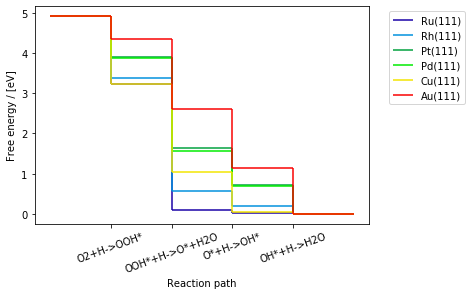

In [4]:
# The potential
U=0
# The compounds of products and reactants
products=[['OOH*'],['O*','H2O'],['OH*'],['H2O']]
reactants=[['O2','H'],['OOH*','H'],['O*','H'],['OH*','H']]

def free_energy_potential(pd_free,reactants,products,U=0):
    'Calculate the free energy with potentials'
    # Make reaction labels
    reactants_label=['+'.join(reactants[i]) for i in range(len(reactants))]
    products_label=['+'.join(products[i]) for i in range(len(products))]
    reactions=[reactants_label[i]+'->'+products_label[i] for i in range(len(products))]
    pd_dict={'Reactions':reactions}
    for s,surf in enumerate(pd_free['Surface']):
        pd_dict[surf]=[]
        # Calculate reaction free energies
        for r in range(len(reactions)):
            G=0
            # Calculate the free energy for the product 
            for prod in products[r]:
                G=G+pd_free[prod][s]
                if prod=='H':
                    G=G+U*(-1)
            # Calculate the free energy for the reactants
            for rea in reactants[r]:
                G=G-pd_free[rea][s]
                if rea=='H':
                    G=G-U*(-1)
            pd_dict[surf].append(G)
    pd_dict=pd.DataFrame(pd_dict)
    return pd_dict

def free_energy_diagram_potential(free_change,ylabel='Free energy / [eV]',rotation=20,ref_scale=False):
    # Plot the free energy diagram
    cmap=matplotlib.cm.get_cmap('nipy_spectral')
    for s,surf in enumerate(free_change.keys()):
        if surf is not 'Reactions':
            x_list=list(range(len(free_change['Reactions'])+2))
            hline=[0]
            G=0
            for r in x_list[:-2]:
                G+=free_change[surf][r]
                hline.append(G)
            if ref_scale:
                hline=np.array(hline)-G
            color=cmap(s/len(free_change.keys()))
            plt.hlines(hline,x_list[:-1],x_list[1:],label=surf,color=color)
            plt.vlines(x_list[1:-1],hline[:-1],hline[1:],color=color)
    plt.xticks(x_list[1:-1],free_change['Reactions'],rotation=rotation)
    plt.legend(bbox_to_anchor=(1.3,1.0))
    plt.ylabel(ylabel)
    plt.xlabel('Reaction path')
    pass


free_change=free_energy_potential(pd_free,reactants,products,U=U)
display(free_change)

free_energy_diagram_potential(free_change,ylabel='Free energy / [eV]',rotation=20,ref_scale=True)
plt.show()

## 2)

Give a brief definition of ORR and OER and what the overpotential is in each case.
What is the computational estimation of both overpotentials for Pt based on the obtained data?
Create a free energy diagram for the ORR for Pt(111) at the potentials U = (0 V, \[rate-limiting potential], 1.23 V).


### Solution

ORR is the formation of water from molecular oxygen O$_2$ and proton-electron pairs. 
At $U$ = 0 V this reaction has a free energy of $\Delta G$ = -4.92 eV. 
Distributed over four transferred electrons this would give a maximum potential of $U$ = 1.23 V that one could use in a fuel cell.
The overpotential is the difference between the observed potential and this maximum possible potential.

OER is the reverse reaction. 
Thermodynamically a potential of $U$ = 1.23 eV would be required.
The overpotential is the difference between the observed potential and this minimum required potential.

Computational estimation:
\begin{align}
\eta_{\rm{ORR}} =& 1.23 V + \max(\Delta G_1,\Delta G_2,\Delta G_3,\Delta G_4) \\
\eta_{\rm{ORR,Pt}} =& 0.52 \rm{V} \\
\eta_{\rm{OER}} =& -1.23 V - \min(\Delta G_1,\Delta G_2,\Delta G_3,\Delta G_4) \\
\eta_{\rm{OER,Pt}} =& 1.05 \rm{V} .\\
\end{align}

In [5]:
print('ORR Overpotential for Pt(111) = {:.2f} V'.format(1.23+np.max(free_change['Pt(111)'])))
print('OER Overpotential for Pt(111) = {:.2f} V'.format(-1.23-np.min(free_change['Pt(111)'])))
poten_lim=-np.max(free_change['Pt(111)'])
print('Rate limiting potential = {:.2f} V'.format(poten_lim))


ORR Overpotential for Pt(111) = 0.52 V
OER Overpotential for Pt(111) = 1.05 V
Rate limiting potential = 0.71 V


,Reactions,0.0,0.71,1.23
0,O2+H->OOH*,-1.01,-0.30,0.22
1,OOH*+H->O*+H2O,-2.28,-1.57,-1.05
2,O*+H->OH*,-0.92,-0.21,0.31
3,OH*+H->H2O,-0.71,0.00,0.52


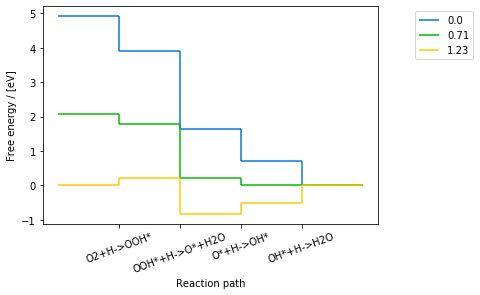

In [6]:
surface='Pt(111)'
free_potentials={}
for U in [0.0,poten_lim,1.23]:
    free_change_pot=free_energy_potential(pd_free,reactants,products,U)
    free_potentials['Reactions']=free_change_pot['Reactions']
    free_potentials[U]=free_change_pot[surface]

free_potentials=pd.DataFrame(free_potentials)
display(free_potentials)
free_energy_diagram_potential(free_potentials,ylabel='Free energy / [eV]',rotation=20,ref_scale=True)
plt.show()

## 3)

Form scaling relation between the energies of OH$^*$ and O$^*$.
Calculate the ORR overpotential for the metals where you have looked up the energies.
Calculate the ORR overpotential as a continuous function of the descriptor E$_{\rm{O^*}}$ using the scaling relations you have obtained.
Plot the negative ORR overpotential of the individual metals as well as the continuous function against the descriptor E$_{\rm{O^*}}$.
(The plots should be volcano-shaped)

### Solution

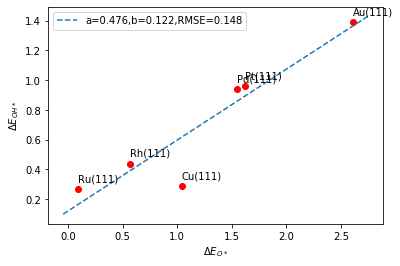

,Compounds,a,b,RMSE
0,OH*,0.475648,0.122025,0.148186


In [7]:
# The descriptor used
descriptor='O*'

scaling_comp=['OH*']

# Load compound energies
pd_energy_surf=pickle.load(open('HW6_compound_energies.pkl','rb'))

# Plot the scaling relations
pd_scaling={'Compounds':[],'a':[],'b':[],'RMSE':[]}
for comp in scaling_comp:
    fig,ax=plt.subplots()
    x=pd_energy_surf[descriptor].values
    y=pd_energy_surf[comp].values
    ax.scatter(x,y,color='red')
    for s,surf in enumerate(pd_energy_surf['Surface']):
        plt.text(x[s],y[s]+0.05,surf)
    # Make linear fit
    a,b=np.polyfit(x,y,1) 
    x_axis=np.linspace(ax.get_xbound()[0],ax.get_xbound()[1],50)
    y_pred=a*x+b
    # Calculate root-mean-square error
    rmse=np.sqrt(np.mean((y-y_pred)**2))
    plt.plot(x_axis,a*x_axis+b,'--',label='a={:.3f},b={:.3f},RMSE={:.3f}'.format(a,b,rmse))
    ylab='$\Delta E_{'+comp+'}$'
    plt.ylabel(ylab)
    plt.xlabel('$\Delta E_{O*}$')
    ax.legend(loc=0)
    plt.show()
    # Save linear scaling  
    pd_scaling['Compounds'].append(comp)
    pd_scaling['a'].append(a)
    pd_scaling['b'].append(b)
    pd_scaling['RMSE'].append(rmse)

pd_scaling=pd.DataFrame(pd_scaling)
display(pd_scaling)
pickle.dump(pd_scaling,open('Linear_scaling_HW6.pkl','wb'))

In [8]:
dim=100
descriptor=np.linspace(-1,5,dim)

pd_free_scaling={}
# Use the reference condition that the free energy of H2O and H2 is 0 eV
pd_free_scaling['H2O']=np.array([0]*dim)
pd_free_scaling['H2']=np.array([0]*dim)
# Condition b
pd_free_scaling['H']=copy.deepcopy(pd_free_scaling['H2'])/2
# Use the Free energy from the total reaction 
pd_free_scaling['O2']=2*pd_free_scaling['H2O']-4*pd_free_scaling['H']-(-4.92)
# Condition c
pd_free_scaling['O*']=descriptor+0.01
# Use scaling relations
pd_free_scaling['OH*']=pd_scaling['a'][0]*descriptor+pd_scaling['b'][0]-0.25
# Condition d 
pd_free_scaling['OOH*']=pd_free_scaling['H2O']+pd_free_scaling['OH*']-2*pd_free_scaling['H']-(-3.2)

print('Free energies with scaling:')
pd_free_scaling=pd.DataFrame(pd_free_scaling)
display(pd_free_scaling)

Free energies with scaling:


,H2O,H2,H,O2,O*,OH*,OOH*
0,0,0,0.0,4.92,-0.990000,-0.603623,2.596377
1,0,0,0.0,4.92,-0.929394,-0.574796,2.625204
2,0,0,0.0,4.92,-0.868788,-0.545969,2.654031
3,0,0,0.0,4.92,-0.808182,-0.517142,2.682858
4,0,0,0.0,4.92,-0.747576,-0.488314,2.711686
...,...,...,...,...,...,...,...
95,0,0,0.0,4.92,4.767576,2.134958,5.334958
96,0,0,0.0,4.92,4.828182,2.163785,5.363785
97,0,0,0.0,4.92,4.888788,2.192612,5.392612
98,0,0,0.0,4.92,4.949394,2.221439,5.421439


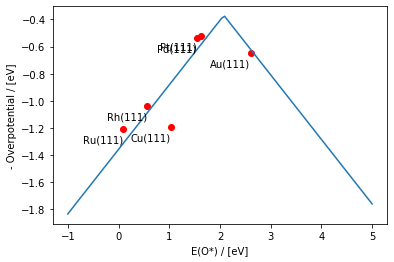

In [9]:
# The potential
U=0
# The compounds of products and reactants
products=[['OOH*'],['O*','H2O'],['OH*'],['H2O']]
reactants=[['O2','H'],['OOH*','H'],['O*','H'],['OH*','H']]

def free_energy_potential_descriptor(pd_free,reactants,products,descriptor,U=0):
    'Calculate the free energy with potentials for a descriptor'
    # Make reaction labels
    reactants_label=['+'.join(reactants[i]) for i in range(len(reactants))]
    products_label=['+'.join(products[i]) for i in range(len(products))]
    reactions=[reactants_label[i]+'->'+products_label[i] for i in range(len(products))]
    pd_dict={'Reactions':reactions}
    for s,surf in enumerate(pd_free[descriptor]):
        pd_dict[surf]=[]
        # Calculate reaction free energies
        for r in range(len(reactions)):
            G=0
            # Calculate the free energy for the product 
            for prod in products[r]:
                G=G+pd_free[prod][s]
                if prod=='H':
                    G=G+U*(-1)
            # Calculate the free energy for the reactants
            for rea in reactants[r]:
                G=G-pd_free[rea][s]
                if rea=='H':
                    G=G-U*(-1)
            pd_dict[surf].append(G)
    pd_dict=pd.DataFrame(pd_dict)
    return pd_dict

def overpotential_orr(Gs,potential=1.23):
    'Calculate the overpotential of ORR'
    return -(potential+np.max(Gs))

free_scaling=free_energy_potential_descriptor(pd_free_scaling,reactants,products,'O*',U=0)
# Get the overpotential values for all descriptor values
overpoten_scaling=[overpotential_orr(free_scaling[key]) for key in pd_free_scaling['O*']]

# Get the surfaces
surfaces=[key for key in free_change.keys() if key!='Reactions']
# Plot
plt.plot(descriptor,overpoten_scaling)
for surf in surfaces:
    i_s=list(pd_surf['Surface']).index(surf)
    over_value=overpotential_orr(free_change[surf])
    plt.scatter([pd_surf['O*'][i_s]],[over_value],color='r')
    plt.text(pd_surf['O*'][i_s]-0.8,over_value-0.1,surf)
    
plt.xlabel('E(O*) / [eV]')
plt.ylabel('- Overpotential / [eV]')
plt.show()


## 4) 

For ORR/OER briefly discuss the follow questions: What limits the overpotential if the scaling relations apply?
What is the best possible overpotential?
Does it match the minimal overpotential of the plot in 3)?
Which reaction steps lead to the overpotential on the left/right side of the volcano?
How is this influenced by assumption d)?
Try to explain assumption d) in terms of scaling relations.

### Solution

ORR: 
According to assumption d) the sum of the reaction free energies of step 2 and 3 is constant (-3.2 eV).
The lowest possible overpotential would result from an equal partitioning of the remaining reaction free energy (-4.92 eV + 3.2 eV = -1.72 eV ) between step 1 and 4.
This would at best give an overpotential of $\eta_{\rm{ORR,optimum}} / \rm V =1.23-(4.92-3.2)/2=0.37$.
It matches the best overpotential in the plot.
Unreactive side (right leg) limited by reaction 1, reactive side (left leg) limited by reaction 4.
The limitation results directly from assumption d).
Assumption d) is identical to a (free energy) scaling relation between OH$^*$ and OOH$^*$ with slope=1.
It can be explained by the similar bonding of OH and OOH to the surface.
Both are bonded through oxygen atoms that already have a single bond.


OER:
The best overpotential within the scaling relations results from an equal partitioning of the -3.2 eV between step 2 and 3.
This would at best give an overpotential of $\eta_{\rm{OER,optimum}} / \rm V =-1.23+3.2/2=0.37$.
Exactly the same as of ORR.
Unreactive side (right leg) limited by reaction 3, reactive side (left leg) limited by reaction 2.